In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
data[data.duplicated()].shape

(0, 6)

In [5]:
data = data.rename({'Taxable.Income': 'TaxableIncome'}, axis=1)

In [6]:
data['TaxableIncome'] = pd.cut(data.TaxableIncome,bins=(0,30000,199778),labels=['Risky','Good'])
data

,Undergrad,Marital.Status,TaxableIncome,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


<Figure size 1440x1440 with 0 Axes>

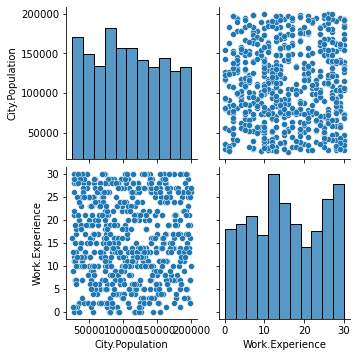

In [7]:
plt.figure(figsize=(20 , 20 ))
sns.pairplot(data)

In [8]:
x = data.iloc[:,:-1]
y=data.iloc[:,-1]

In [9]:
label_encoder_x=LabelEncoder()

In [10]:
x=x.apply(LabelEncoder().fit_transform)

In [11]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
rf

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [12]:
rf.fit(x,y)

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [13]:
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1651611759),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1754503360),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=445387824),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=848315694),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1319258701),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=737040495),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1980972046),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1925362028),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
         

In [14]:
data['rf_pred'] = rf.predict(x)

In [15]:
cols = ['rf_pred','TaxableIncome']
cols

['rf_pred', 'TaxableIncome']

In [16]:
data[cols].head()

,rf_pred,TaxableIncome
0,YES,Good
1,YES,Good
2,YES,Good
3,YES,Good
4,NO,Good


In [17]:
data['TaxableIncome']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxableIncome, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [18]:
confusion_matrix(data['TaxableIncome'],data['rf_pred'])

array([[  0, 237,   0, 239],
       [  0,   0,   0,   0],
       [  0,  61,   0,  63],
       [  0,   0,   0,   0]], dtype=int64)

In [19]:
pd.crosstab(data['TaxableIncome'],data['rf_pred'])

rf_pred,NO,YES
TaxableIncome,,
Risky,61,63
Good,237,239
